In [41]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
datasets = pd.read_csv('WL.csv')

In [3]:
datasets = pd.DataFrame(datasets)

In [4]:
datasets.head()

,WaterLevel,Discharge,MaxVelocity
0,4.80,163.16,0.25
1,4.37,146.12,0.25
2,4.25,120.07,0.23
3,3.97,113.66,0.22
4,3.92,105.33,0.21


In [5]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WaterLevel   271 non-null    float64
 1   Discharge    271 non-null    float64
 2   MaxVelocity  271 non-null    float64
dtypes: float64(3)
memory usage: 6.5 KB


In [6]:
print(max(datasets.WaterLevel))
print(min(datasets.WaterLevel))
print(np.mean(datasets.WaterLevel))
print(np.median(datasets.WaterLevel))

12.55
3.07
7.293062730627306
7.32


In [7]:
datasets.WaterLevel.unique()

array([ 4.8 ,  4.37,  4.25,  3.97,  3.92,  4.18,  4.64,  4.93,  6.53,
        5.45,  8.07,  7.3 , 10.19,  9.69,  8.6 ,  7.46,  7.66,  8.46,
        8.98,  7.98,  8.39,  8.12,  5.99,  4.99,  4.98,  4.06,  3.21,
        3.07,  3.54,  4.08,  3.58,  3.7 ,  5.13,  4.56,  4.76,  5.52,
        7.62,  7.52,  8.43,  7.76,  9.42,  9.29,  9.38,  7.83,  8.84,
        9.58,  8.61,  5.68,  4.94,  4.78,  4.31,  4.09,  3.8 ,  3.68,
        3.72,  3.87,  7.69,  9.96,  3.71,  3.37,  3.43,  3.46,  3.14,
        3.81,  4.15,  5.26,  6.55,  6.06,  6.75,  9.5 ,  9.55,  9.83,
       10.75, 10.22, 12.54, 10.9 , 11.37, 11.31,  9.05,  8.97,  7.32,
        7.53,  6.16,  5.76,  5.29,  5.  ,  4.42,  4.54,  4.16,  4.53,
        4.5 ,  5.85,  5.9 ,  7.31,  9.77,  9.75, 10.7 , 10.73, 10.61,
       10.92,  9.99,  8.26,  9.19,  6.26,  5.89,  5.95,  5.22,  5.18,
        4.79,  4.6 ,  4.2 ,  4.17,  4.65,  5.94,  8.24,  7.08,  8.51,
        7.73,  8.67,  9.6 , 10.03, 10.56,  9.26, 10.6 , 10.88, 10.07,
        9.95,  8.08,

In [8]:
datasets['WaterLevel'] = np.where(datasets['WaterLevel'] < 9, 0, datasets['WaterLevel'])
datasets['WaterLevel'] = np.where(datasets['WaterLevel'] >= 9, 1, datasets['WaterLevel'])

In [9]:
datasets['WaterLevel'].unique()

array([0., 1.])

In [10]:
datasets.WaterLevel.value_counts()

0.0    185
1.0     86
Name: WaterLevel, dtype: int64

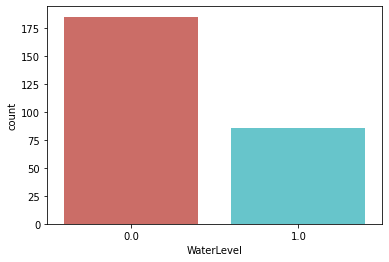

<Figure size 432x288 with 0 Axes>

In [11]:
sns.countplot(x='WaterLevel', data = datasets, palette='hls')
plt.show()
plt.tight_layout()
plt.show()

In [12]:
count_Risk_water_label = len(datasets[datasets['WaterLevel'] == 0])
count_Safe_label = len(datasets[datasets['WaterLevel'] == 1])
percentage_of_label_of_risk_water = count_Risk_water_label/(count_Risk_water_label + count_Safe_label)
print('Percentage of Risk Water label : ',percentage_of_label_of_risk_water *100)
percentage_of_Safe_water_label = count_Safe_label/ (count_Risk_water_label + count_Safe_label)
print('Percentage of Safe Water label is : ', percentage_of_Safe_water_label*100)

Percentage of Risk Water label :  68.26568265682657
Percentage of Safe Water label is :  31.73431734317343


In [14]:
datasets.groupby('WaterLevel').mean()

,Discharge,MaxVelocity
WaterLevel,,
0.0,234.368054,0.268811
1.0,696.478256,0.246395


###  Data Visualization

<Figure size 1440x1152 with 0 Axes>

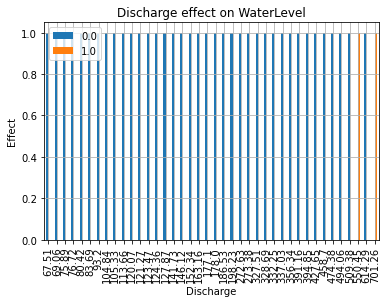

In [21]:
plt.figure(figsize=(20, 16))
pd.crosstab(datasets.Discharge[:40], datasets.WaterLevel).plot(kind = 'bar')
plt.title('Discharge effect on WaterLevel')
plt.xlabel('Discharge')
plt.ylabel('Effect')
plt.legend(loc= 'upper left')
plt.grid(True)
plt.show()

<Figure size 1440x1152 with 0 Axes>

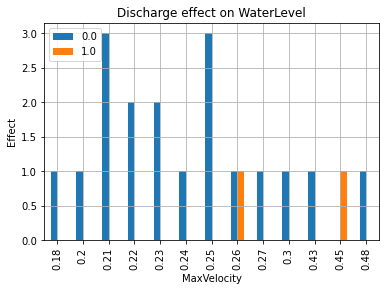

In [23]:
plt.figure(figsize=(20, 16))
pd.crosstab(datasets.MaxVelocity[:20], datasets.WaterLevel).plot(kind = 'bar')
plt.title('Discharge effect on WaterLevel')
plt.xlabel('MaxVelocity')
plt.ylabel('Effect')
plt.legend(loc= 'upper left')
plt.grid(True)
plt.show()

In [25]:
cols = ['Discharge', 'MaxVelocity']
X = datasets[cols]
y = datasets['WaterLevel']

In [26]:
model = sm.Logit(y, X)
model_result = model.fit()

Optimization terminated successfully.
         Current function value: 0.581474
         Iterations 8


In [30]:
print(model_result.summary())
print('\n')
print('*****************************************************************************')
print('\n')
print(model_result.summary2())

                           Logit Regression Results                           
Dep. Variable:             WaterLevel   No. Observations:                  271
Model:                          Logit   Df Residuals:                      269
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                 0.06942
Time:                        23:03:30   Log-Likelihood:                -157.58
converged:                       True   LL-Null:                       -169.33
Covariance Type:            nonrobust   LLR p-value:                 1.243e-06
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Discharge       0.0048      0.001      5.566      0.000       0.003       0.007
MaxVelocity    -9.1030      1.489     -6.115      0.000     -12.021      -6.185


**********************************************

### Logistic Regression

In [31]:
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
logistic_model = LogisticRegression()

In [33]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [44]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


In [36]:
y_predict  = logistic_model.predict(x_test)
print('Accuracy of Logistic regression on test datasets is : {:.2f}'.format(logistic_model.score(x_test, y_test)))

Accuracy of Logistic regression on test datasets is : 0.93


### Confusion Matrix

In [38]:
model_confusion_metrix = confusion_matrix(y_test, y_predict)
print(model_confusion_metrix)

[[33  1]
 [ 3 18]]


### This result is telling us thar we have [33+18] = 51 correct predictions and [3+1] = 4 incorrect predictions

In [40]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        34
         1.0       0.95      0.86      0.90        21

    accuracy                           0.93        55
   macro avg       0.93      0.91      0.92        55
weighted avg       0.93      0.93      0.93        55



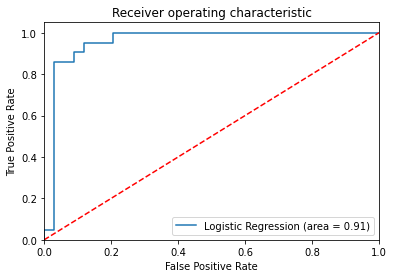

In [42]:
logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()